
# ПРОЕКТ ИНТЕРНЕТ-МАГАЗИНА «СТРИМЧИК».

***Описание исследования.*** 

Данное исследование проведено для интернет-магазина "Стримчик", который осуществляет деятельность по продаже компьютерных игр по всему миру.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й. Необходимо отработать принцип работы с данными.

***Цель исследования.***

Провести анализ данных при помощи которых интернет-магазин разработает стратегию будущих продаж компьютерных игр.

***Задачи исследования.***

Проведение анализа данных, отработка принципов работы с данными, выявление закономерностей, определяющих успешность компьютерных игр для планирования кампании в будущем.

***Исходные данные.***

Исторические данные из открытых источников о продажах компьютерных игр, оценках пользователей и экспертов, жанрах игр и платформах. Также имеются данные о продажах игр Северной Америке, Европе и Японии.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Изучение общей информации. ## 

### Загрузим данные из файла в датафрейм.

In [1]:
# импортируем библиотеки
import pandas as pd
#!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import math
from scipy import stats as st
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
from pymystem3 import Mystem
m = Mystem()
sns.set()

from scipy import stats as st
from urllib.request import urlretrieve
from pathlib import Path

# зададим формат отображения вещественных чисел в Pandas, два знака после запятой
pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
# прочитаем файл с данными и сохраненим его в data
try:
 data = pd.read_csv('/datasets/games.csv', sep='\t')
except:
 data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')    

### Изучим общую информацию о полученном датафрейме.

In [3]:
#получим первые 5 строк и посмотрим как выглядит таблица
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.shape

(16715, 11)

In [5]:
# получим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Выведем количество явных дубликатов.

In [6]:
# подсчитаем количество явных дубликатов
data.duplicated().sum()

0

### Определим наличие неявных дубликатов в столбцах 'Genre' и 'Name'.

In [7]:
#проверим, есть ли дубликаты в жанрах:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
# проверим наличие неявных дубликатов для пары "Имя - Игровая консоль" (1 вариарт)
duplicate = data[data.duplicated(['Name', 'Platform'])]
print(duplicate)

                              Name Platform  Year_of_Release     Genre  \
1591   Need for Speed: Most Wanted     X360         2,005.00    Racing   
4127            Sonic the Hedgehog      PS3              NaN  Platform   
11715  Need for Speed: Most Wanted       PC         2,012.00    Racing   
14244                          NaN      GEN         1,993.00       NaN   
16230                Madden NFL 13      PS3         2,012.00    Sports   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
1591       1.00      0.13      0.02         0.10         83.00        8.5   
4127       0.00      0.48      0.00         0.00         43.00        4.1   
11715      0.00      0.06      0.00         0.02         82.00        8.5   
14244      0.00      0.00      0.03         0.00           NaN        NaN   
16230      0.00      0.01      0.00         0.00         83.00        5.5   

      Rating  
1591       T  
4127    E10+  
11715      T  
14244    NaN  
16230      E  


In [9]:
# проверим есть ли неявные дубликаты для пары "Имя - Игровая консоль" 
# и сколько их (2 вариарт)
data[['Name', 'Platform']].duplicated().sum()

5

In [10]:
# выводим посмотреть этоти неявные дубликаты (2 вариарт)
data[['Name', 'Platform']].value_counts()

Name                               Platform
Sonic the Hedgehog                 PS3         2
Need for Speed: Most Wanted        PC          2
                                   X360        2
Madden NFL 13                      PS3         2
 Beyblade Burst                    3DS         1
                                              ..
Halo: Combat Evolved Anniversary   X360        1
Halo: Reach                        X360        1
Halo: The Master Chief Collection  XOne        1
Hammerin' Hero                     PSP         1
¡Shin Chan Flipa en colores!       DS          1
Length: 16709, dtype: int64

In [11]:
# проверим есть ли неявные дубликаты для пары "Имя - Игровая консоль" 
# и сколько их (3 вариарт)
data.loc[data.duplicated(subset=['Name', 'Platform'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


Посмотрели количество неявных дубликатов в столбце 'Genre' и для пары 'Name'+'Platform'. В столбце 'Genre' дубликатов не обнаружили. В паре 'Name'+'Platform' обнаружили 5 неявных дубликатов, однако удалять их не будем, т.к. имеются различия в других столбцах.

### Построим общую гистограмму для всех числовых столбцов таблицы.

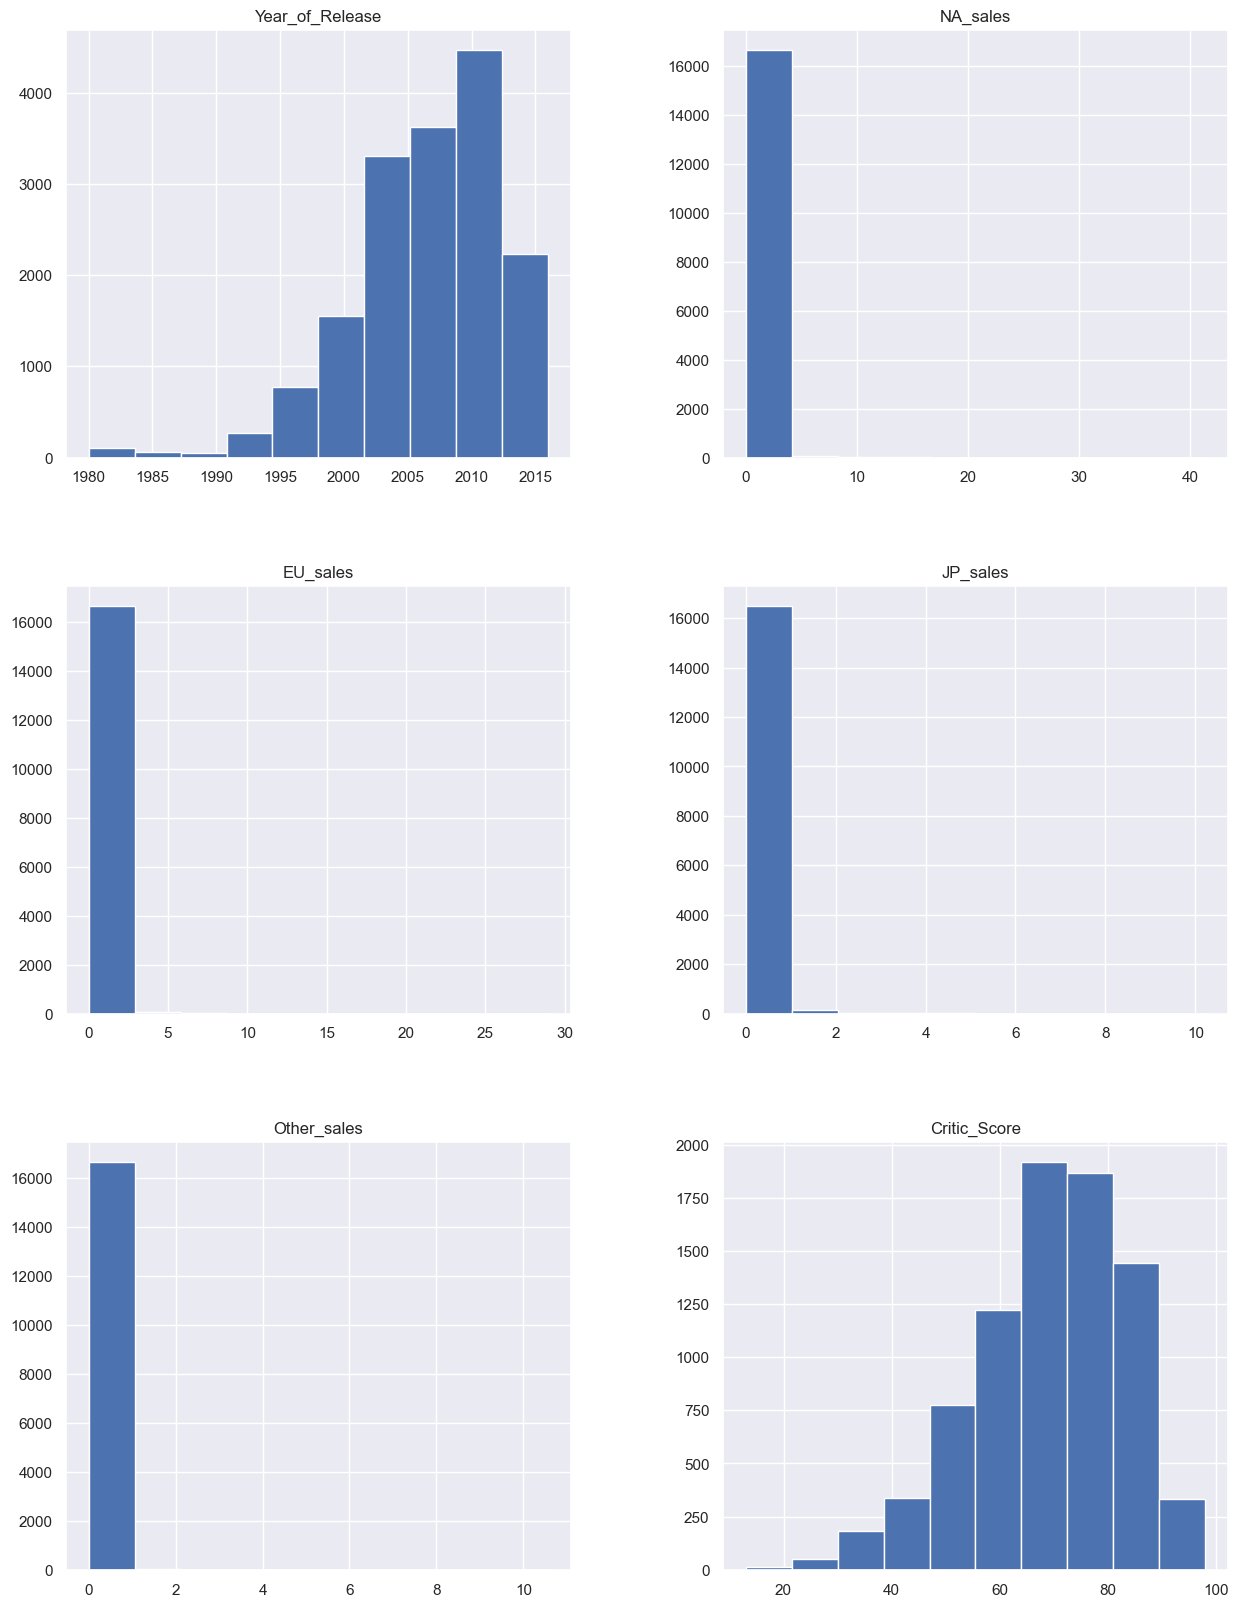

In [12]:
# в конце кода добавляем знак ';' чтобы скрыть дополнительную информацию
data.hist(figsize=(15, 20));

*ВЫВОД:* В первой части проекта мы загрузили данные из файла в датафрейм, изучили общую информацию о данных. Определили наличие явных и неявных дубликатов. Построили общую гистограмму для всех числовых столбцов таблицы для получения общей информации.

## Подготовка данных. ## 

### Заменим названия столбцов.

In [13]:
# приведем к нижнему регистру название столбцов
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изучим и обработаем данные в столбцах с оценками. 

In [14]:
# изучим уникальные значения в столбце 'critic_score'
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
# изучим уникальные значения в столбце 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
# посмотрим в какой период чаще всего встречалось это значение
data[data['user_score'] == 'tbd']['year_of_release'].value_counts()

2,009.00    405
2,010.00    331
2,008.00    326
2,011.00    217
2,002.00    192
2,007.00    192
2,006.00    124
2,005.00    121
2,004.00    107
2,003.00     95
2,001.00     82
2,000.00     43
2,015.00     38
2,016.00     34
2,012.00     24
2,014.00     21
2,013.00     15
1,999.00      8
1,997.00      1
Name: year_of_release, dtype: int64

При изучении уникальных значений столбца 'user_score' встречается значение 'tbd', которое означает, что какая-то информация еще не определена или решение по вопросу не принято. И это значение чаще всего встречается в период с 2002 по 2011г.
Следовательно, если как такового решения еще нет, значит можем заменить все 'tbd' на nan.

In [17]:
#заменяем все 'tbd' на nan
data['user_score'] = data['user_score'].replace('tbd', np.nan)

### Рассмотрим типы данных в каждом столбце и приведем их в нужные типы.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [19]:
# заменим тип данных в столбце 'year_of_release' на 'Int64'
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [20]:
# заменим тип данных в столбце 'user_score' на 'float64'
data['user_score'] = data['user_score'].astype('float64')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработаем пропущенные значения.

In [22]:
# проверим пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [23]:
# сохраним полный датасфрейм для обращения в случае необходимости
data_full = data

In [24]:
# cоздадим функцию для поиска строк с пропусками
def empty_row(col):
    return data[data[col].isnull()]

In [25]:
# посмотрим пропуски в столбце 'name'
empty_row('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [26]:
# посмотрим пропуски в столбце 'genre'
empty_row('genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы видим что это одни и те же игры, их всего 2 и о них на платформе GEN мало что известно. Также без названия коммерческую успешность данных игр определить сложно. Поэтому удалим пропуски одним кодом.

In [27]:
# удалим пропуски в двух столбцах одним кодом, используя метод 'dropna'
data = data.dropna(subset=['name'])

In [28]:
# посмотрим пропуски в столбце 'year_of_release'
empty_row('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.00,8.50,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.00,6.40,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.00,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.00,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.00,6.50,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.00,6.70,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В связи с тем, что пропущенные значения в столбце 'year_of_release' составляют менее чем 2%, удаляем их. В случае необходимости обращения к полным данным, мы сохранили датафрейм до удаления строк как data_full.

In [29]:
# удаляем пропуски в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])

In [30]:
# проверим наличие пропусков в столбце 'year_of_release'
empty_row('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [31]:
# проверим пропуски
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Процент пропущенных значений слишком высокий. 

Поэтому пропуски в столбцах оценок критиков и пользователей оставляем как есть, т.к. если заполним пропуски в данных столбцах нулями, то это понизит рейтинг игры (рейтинг игры в реальности может быть высоким), а если заполним пропуски медианой или средним значением - это так же исказит реальную картину (по факту рейтинг может быть низким).

In [32]:
# в столбце 'rating' заменим пропуски на значение 'no_rating'
data['rating'] = data['rating'].fillna('no_rating')

In [33]:
# проверим пропуски
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [34]:
# добавим столбец 'total_sales' с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


*ВЫВОД:* Во второй части проекта мы выполнили предобработку данных. 

Для лучшего восприятия данных привели к нижнему регистру название столбцов.

Изучили и обработали данные в столбцах с оценками. При изучении уникальных значений столбца 'user_score' встречается значение 'tbd', которое означает, что какая-то информация еще не определена или решение по вопросу не принято. И это значение чаще всего встречается в период с 2002 по 2011г. Следовательно, если как такового решения еще нет, значит можем заменить все 'tbd' на nan.

Преобразовали данные в нужные типы: 

- заменили тип данных в столбце 'year_of_release' на 'Int64' т.к. год - это целое число,
- заменили тип данных в столбце 'user_score' на 'float64', в связи с тем, что для определения оценок важно значение после запятой.

Выявили и обработали пропуски. Пропуски могли появится от незнания каких-либо данных пользователем, нежелания их заполнять или неверного формата. Пропуски в столбце year_of_release возникли возможно из-за того, что игры не вышли в релиз на момент состава датасета.

Пропуски в столбцах 'name', 'genre' и 'year_of_release' удалили в связи с тем, что их менее 2%.

В случае необходимости обращения к полным данным, мы сохранили датафрейм до удаления строк как data_full.

Пропуски в столбцах оценок критиков и пользователей оставляем как есть, т.к. если заполним пропуски в данных столбцах нулями, то это понизит рейтинг игры (рейтинг игры в реальности может быть высоким), а если заполним пропуски медианой или средним значением - это так же исказит реальную картину (по факту рейтинг может быть низким).

Пропуски в столбце 'rating' заменили на значение 'no_rating'. 

## Проведение исследовательского анализа данных. ##

### Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды.

In [35]:
# заменим тип данных в столбце 'year_of_release' на 'Int64'
data['year_of_release'] = data['year_of_release'].astype('int64')

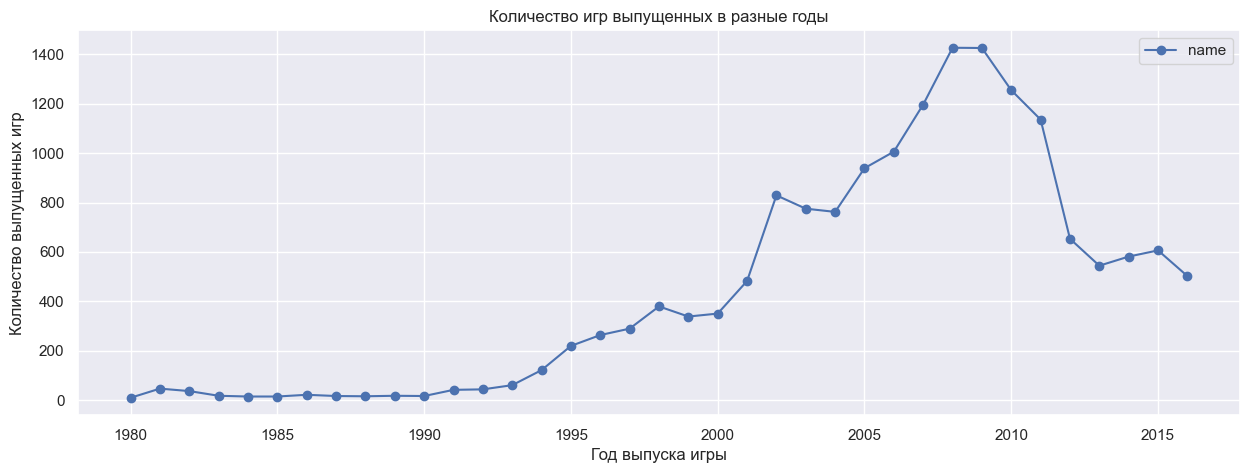

In [36]:
data.pivot_table(index= (data.query('year_of_release != 0')['year_of_release']),
               values= 'name',aggfunc='count').plot( style='o-', figsize=(15, 5))

plt.title('Количество игр выпущенных в разные годы')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.show()


In [37]:
# выделяем интересующий нас период
data = data[data['year_of_release']>=2000]

#data = data[(data['year_of_release'] >= 2000) & (data['year_of_release'] <= 2016)]


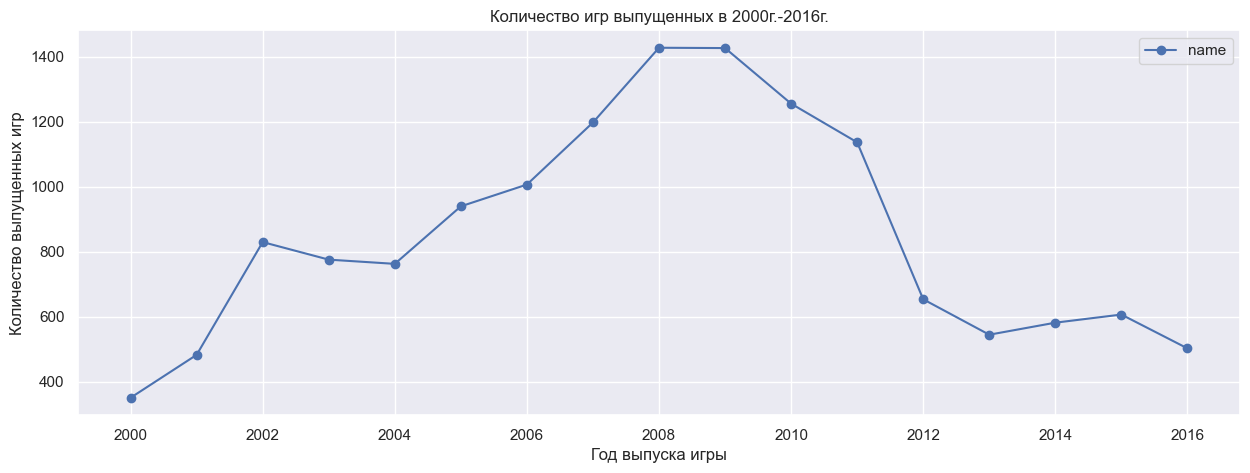

In [38]:
data.pivot_table(index= (data.query('year_of_release != 0')['year_of_release']),
               values= 'name',aggfunc='count').plot( style='o-', figsize=(15, 5))

plt.title('Количество игр выпущенных в 2000г.-2016г.')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.show()

Количество игр росло с 1994, пик роста- 2008-2009 г.,
Затем начинается спад, видимо, связанный с ростом популярности мобильных игр.
Соответственно, для исследования важны данные с 2000 года, когда кол-во игр начало резко расти.

Выделяем интересующий нас период. Именно с этого момента начинается значительный рост рынка видеоигр

### Посмотрим как менялись продажи по платформам за период с 2000г. по 2016г.

Выберем платформы с наибольшими суммарными продажами за период с 2000г. по 2016г.(первые 6 лидеров) и построим распределение по годам. Более короткий период, например который мы выберем в дальнейшем как актуальный, не покажет картину так наглядно. 

In [39]:
# выделяем интересующие нас платформы
sales = data.pivot_table(index ='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)
top_6_platforms = sales.head(6)
top_6_platforms

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14


In [40]:
def sales_changes(name, data):
    return (data.query('platform == @name').pivot_table(index='year_of_release',\
    values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False))

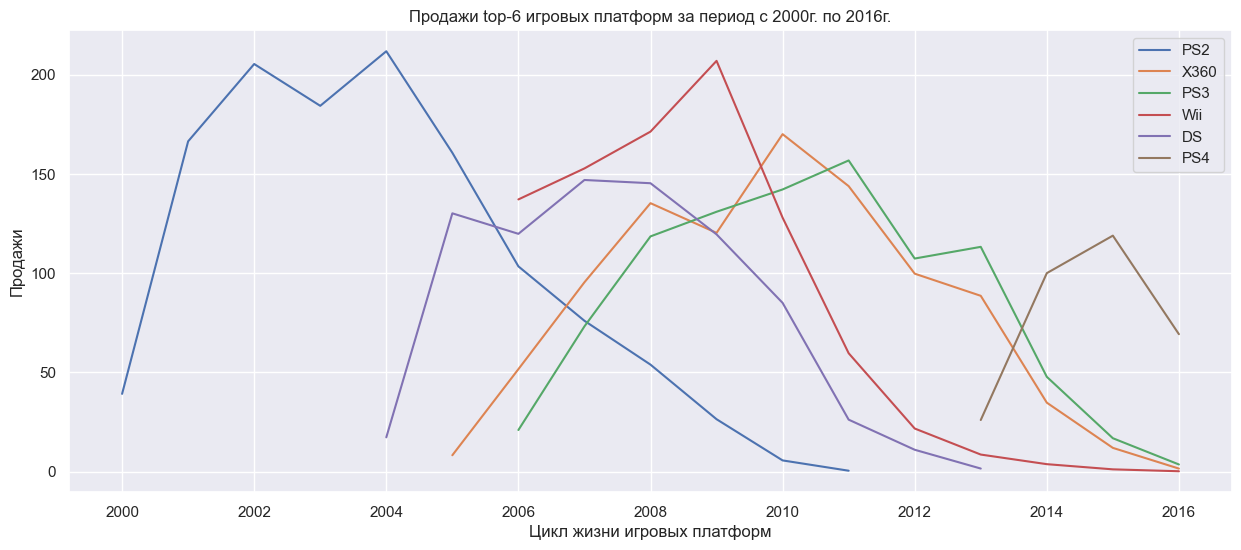

In [41]:
for x in list(top_6_platforms.index):
    sales_changes(x, data)['total_sales'].plot(figsize=(15, 6), label=x,\
                                               title='Продажи top-6 игровых платформ за период с 2000г. по 2016г.')\
    .set(xlabel='Цикл жизни игровых платформ', ylabel='Продажи')
    plt.legend()

Можем сделать вывод, что цикл жизни игровых платформ составляет примерно 10 лет. После начала спада продаж появляется новая платформа.

### На основании проведенных исследований определяем актуальный период с 2015г. по 2016г.  Данные этого периода помогут построить прогноз на 2017 год.

In [42]:
# определяем актуальный период с 2015г. по 2016г.
#data_2014 = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]
data_2015 = data[data['year_of_release']>=2015]

Дальше будем работать с этим периодом.

Посмотрим какие платформы лидируют по продажам в выбранный актуальный период с 2015г. по 2016г., их динамику. Выберем несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Продажи')

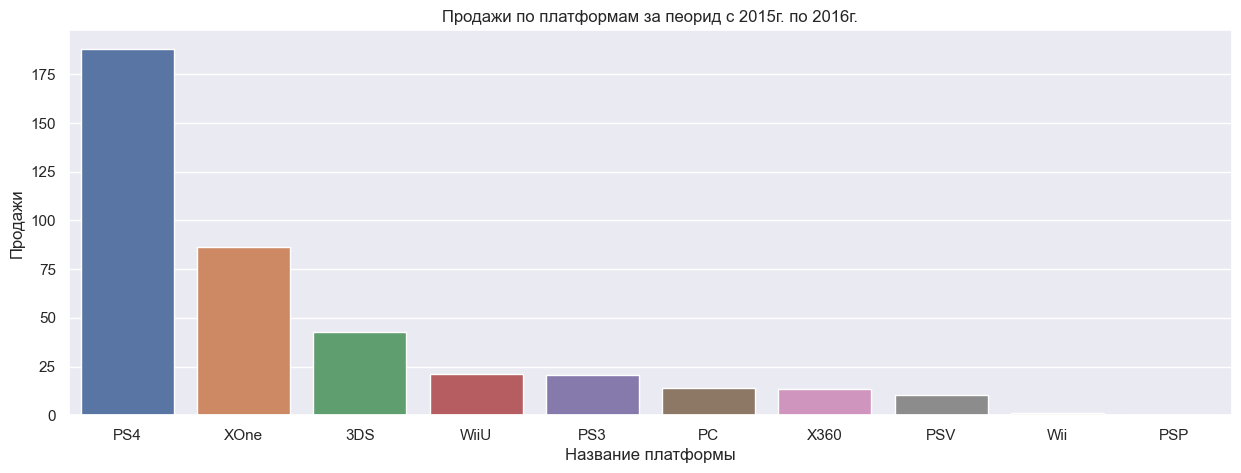

In [43]:
sales = data_2015.pivot_table(index ='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x = sales.index, y = sales['total_sales'])
plt.title('Продажи по платформам за пеорид с 2015г. по 2016г.')
plt.xlabel('Название платформы')
plt.ylabel('Продажи')

In [44]:
# продажи игр по платформам в цифрах
data_2015.groupby('platform')[['total_sales']].sum().sort_values('total_sales', ascending=False)\
.style.bar()

,total_sales
platform,
PS4,188.150000
XOne,86.290000
3DS,42.920000
WiiU,20.950000
PS3,20.420000
PC,13.770000
X360,13.480000
PSV,10.500000
Wii,1.320000


Для наглядности посмотрим на графике с чем связаны низкие продажи: это взлет или падение спроса?

In [45]:
# выделяем 5 топовых платфорт
sales = data_2015.pivot_table(index ='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)
top_5_platforms = sales.head()
top_5_platforms

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42


In [46]:
def sales_changes(name, data):
    return (data_2015.query('platform == @name').pivot_table(index='year_of_release',\
    values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False))

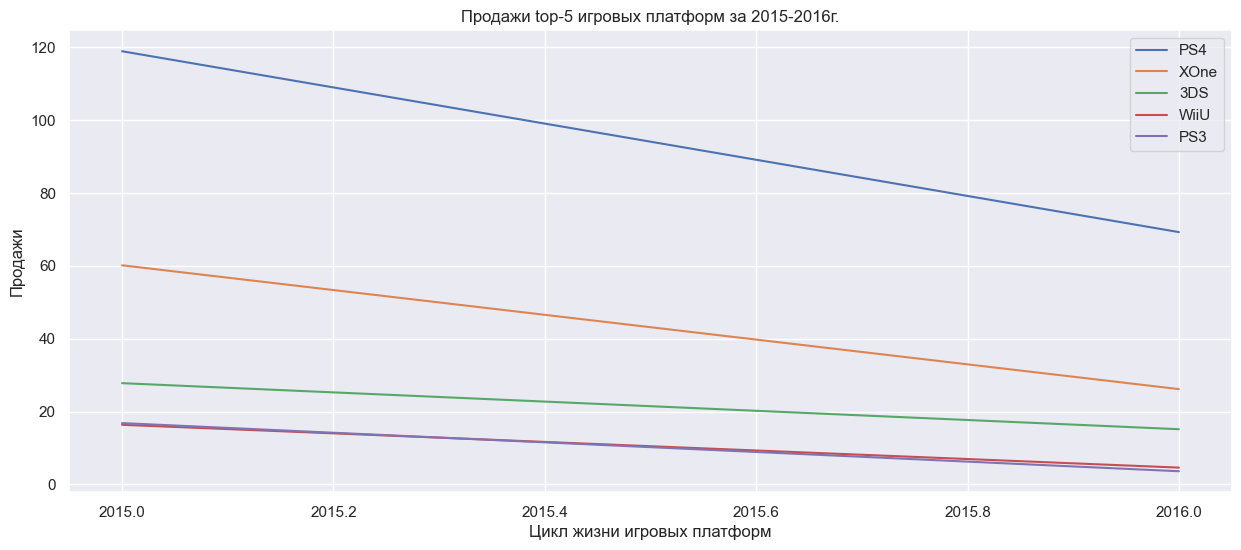

In [47]:
for x in list(top_5_platforms.index):
    sales_changes(x, data)['total_sales'].plot(figsize=(15, 6), label=x,\
    title='Продажи top-5 игровых платформ за 2015-2016г.')\
    .set(xlabel='Цикл жизни игровых платформ', ylabel='Продажи')
    plt.legend()

В целом продажи по всем платформам представленным в датасете к 2016 году падают. Скорее всего 
существуют другие платформы, не учитываемые в предоставленном файле.

Наиболее популярными в выбранный нами актуальный период с 2015г. по 2017г. были платформы PS4, XOne, 3DS, WiiU, PS3.

Платформы, которые имеют перспективы для продаж в 2017 году - PS4, XOne, 3DS.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

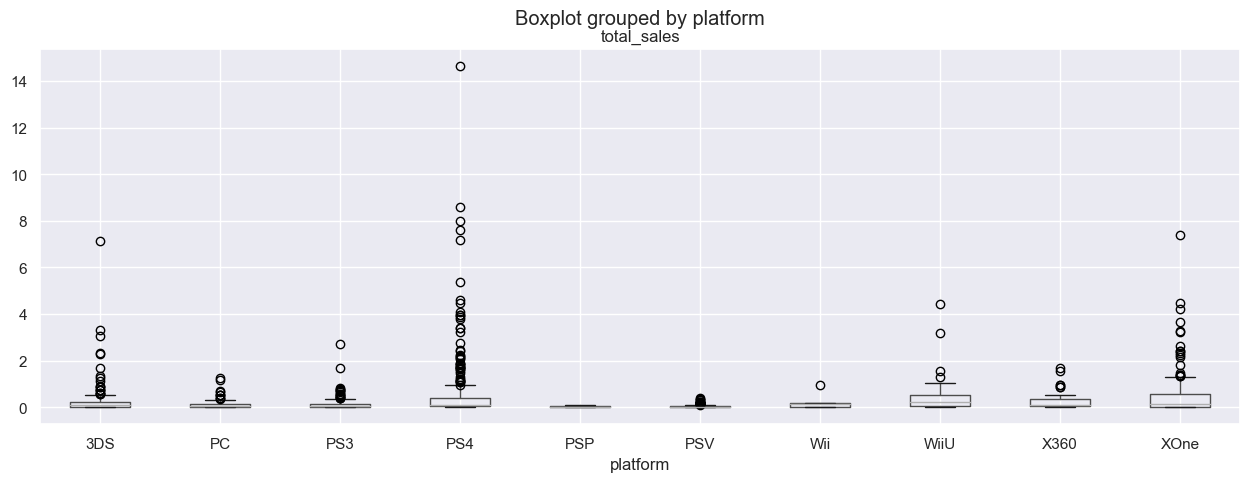

In [48]:
# построим график без метода ylim() чтобы посмотреть наличие выбросов
box = data_2015.boxplot('total_sales',by='platform', figsize=(15,5))#.set_ylim(-0.02, 0.85)

На графике можем видеть наличие выбровов, поэтому будем оценивать медианные значения.

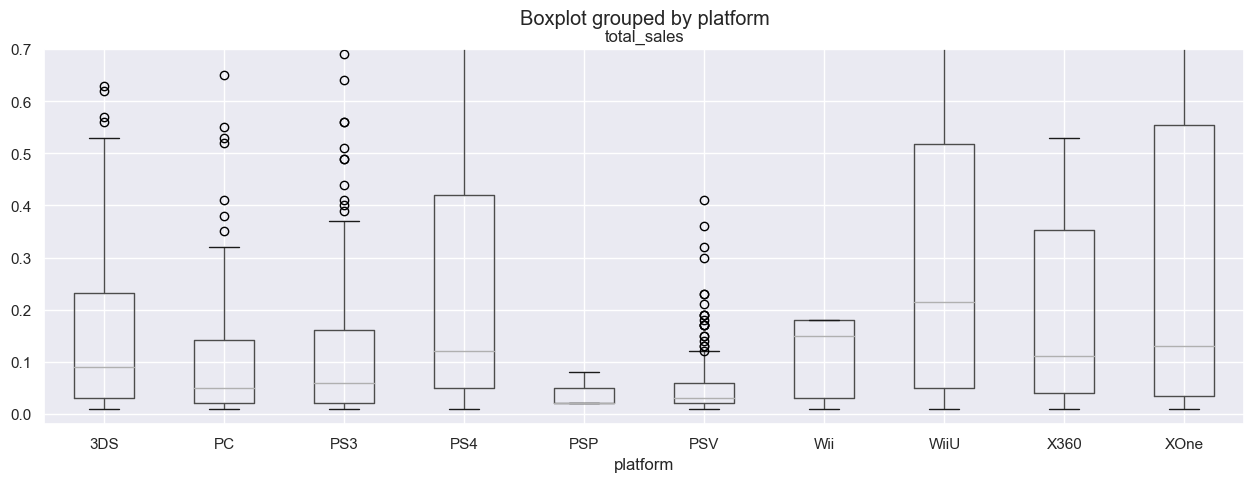

In [49]:
# посмотрим медианные и максимальные значения для платформ после 2015г.
box = data_2015.boxplot('total_sales',by='platform', figsize=(15,5)).set_ylim(-0.02, 0.7)

После 2015 года на диаграмме размаха можно выделить 5 платформ по самым высоким медианным значениям: WiiU, Wii, XOne, PS4 и X360. 

Видим, что медианное значение платформы Wii достаточно высокое, хотя эта платформа не попала в top-5 платформ и судя по прошлым исследованиям цикл жизни данной платформы подходит к концу.

In [50]:
# посмотрим также на средние значения tot-5 платформ
top_5_platforms.groupby('platform')['total_sales'].describe().sort_values( by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,1.00,188.15,NaN,188.15,188.15,188.15,188.15,188.15
XOne,1.00,86.29,NaN,86.29,86.29,86.29,86.29,86.29
3DS,1.00,42.92,NaN,42.92,42.92,42.92,42.92,42.92
WiiU,1.00,20.95,NaN,20.95,20.95,20.95,20.95,20.95
PS3,1.00,20.42,NaN,20.42,20.42,20.42,20.42,20.42


Наибольшие медианные продажи у платформ X360 (0,28) и PS3 (0,27). Почти у всех платформ есть много выбросов. Есть платформа DC, у которой совсем мало продаж.

Межквартильный размах у всех разный. Из общей картины особенно выделяются 'X360', 'PS3' и 'PS4' как платформы с наибольшими продажами. Широкий диапазон этих платформ нам говорит о разнообразии показателей. Но все-таки "ящики" у этих платформ тоже находятся в нижней части, то есть показатели здесь падают.

### Посмотрим, как влияют на продажи внутри одной популярной платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [51]:
# построим матрицу корреляции для платформы PS4
print("Матрица корреляции")
data_2015[data_2015.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляции


,total_sales,critic_score,user_score
total_sales,1.00,0.39,-0.06
critic_score,0.39,1.00,0.53
user_score,-0.06,0.53,1.00


Оценки критиков демонстрируют прямую, средне-слабую корреляцию с 'цифрами' продаж. Оценки пользователей корреляции с продажами не имеют.

Проверим наши выводы на корреляции другой популярной платформы - XOne.

In [52]:
# построим матрицу корреляции для платформы XOne
print("Матрица корреляции")
data_2015[data_2015.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляции


,total_sales,critic_score,user_score
total_sales,1.00,0.43,-0.04
critic_score,0.43,1.00,0.46
user_score,-0.04,0.46,1.00


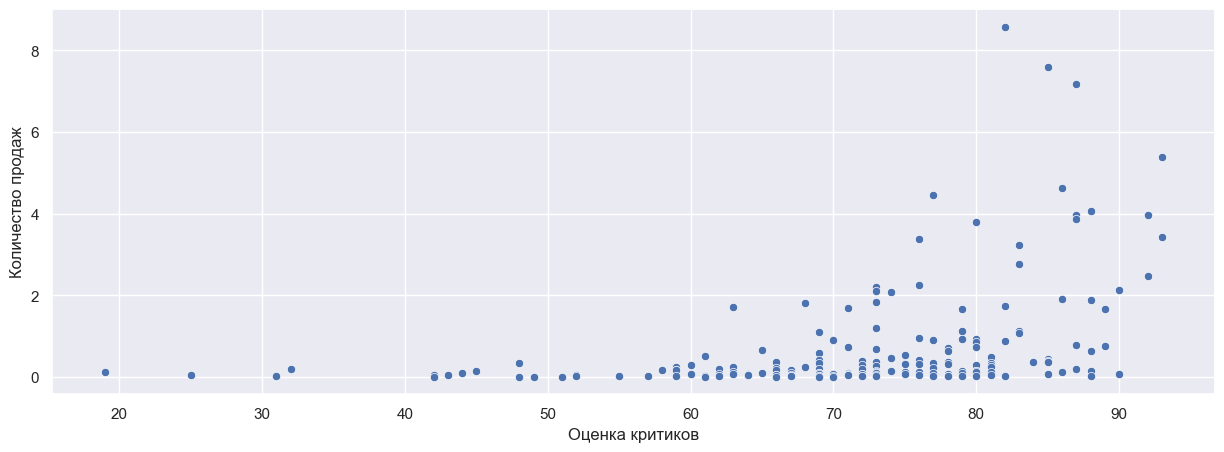

In [53]:
# построим график на примере платформы PS4

PS4 = data_2015[data_2015['platform'] == 'PS4']
plt.figure(figsize=(15,5))
critic = sns.scatterplot(x='critic_score', y='total_sales', data= PS4 )
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

На данном графике можем посмотреть линейную связь между переменными 'total_sales' и 'critic_score'.

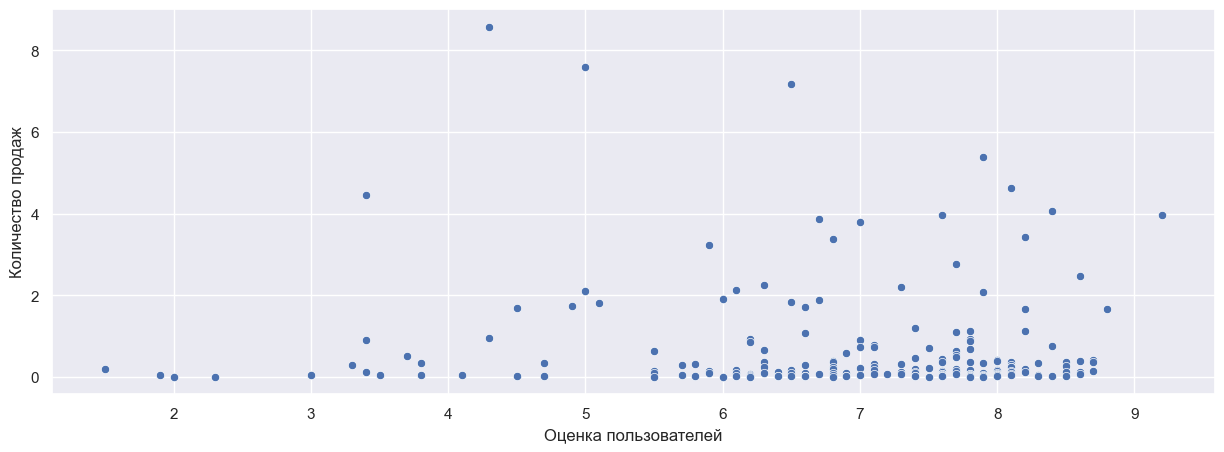

In [54]:
plt.figure(figsize=(15,5))
critic = sns.scatterplot(x='user_score', y='total_sales', data= PS4 )
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

На данном графике можем посмотреть линейную связь между переменными 'total_sales' и 'user_score'.

Соотнесем выводы с продажами игр на других платформах.

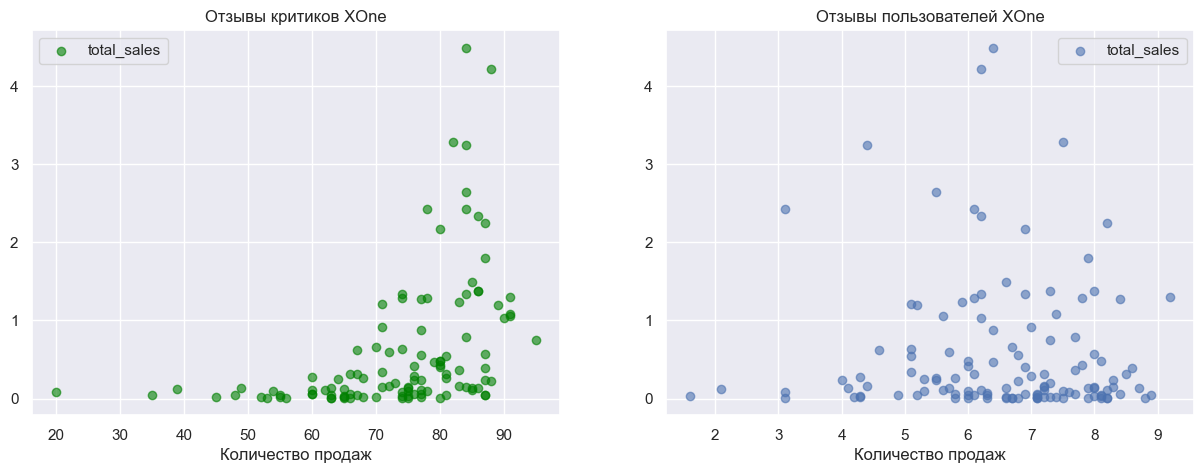

In [55]:
XOne = data_2015[data_2015['platform'] == 'XOne']
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['green']

ax[0].scatter(x='critic_score', y='total_sales', data= XOne, c = colors, alpha=0.6)
ax[0].set_title('Отзывы критиков XOne')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='user_score', y='total_sales', data= XOne, alpha=0.6)
ax[1].set_title('Отзывы пользователей XOne')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()

plt.show()

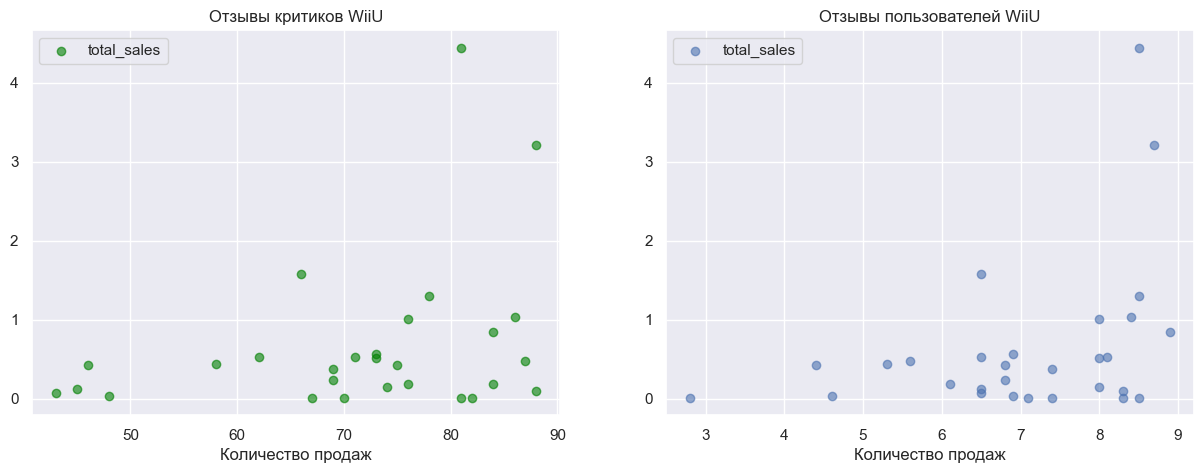

In [56]:
WiiU = data_2015[data_2015['platform'] == 'WiiU']
fig, ax = plt.subplots(1,2, figsize=(15,5))
colors = ['green']

ax[0].scatter(x='critic_score', y='total_sales', data= WiiU, c = colors, alpha=0.6)
ax[0].set_title('Отзывы критиков WiiU')
ax[0].set_xlabel('оценка пользователей')
ax[0].set_xlabel('Количество продаж')
ax[0].legend()

ax[1].scatter(x='user_score', y='total_sales', data= WiiU, alpha=0.6)
ax[1].set_title('Отзывы пользователей WiiU')
ax[1].set_xlabel('оценка пользователей')
ax[1].set_xlabel('Количество продаж')
ax[1].legend()

plt.show()

In [57]:
# построим матрицу корреляции для платформы WiiU
print("Матрица корреляции")
data_2015[data_2015.platform == "WiiU"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляции


,total_sales,critic_score,user_score
total_sales,1.00,0.32,0.36
critic_score,0.32,1.00,0.68
user_score,0.36,0.68,1.00


Оценки критиков демонстрируют прямую, средне-слабую корреляцию с 'цифрами' продаж. Оценки пользователей корреляции с продажами не имеют.

In [58]:
# определеним наиболее прибыльные платформы

platform_sales = data_2015.pivot_table(index ='platform', values='total_sales', aggfunc='mean')\
.sort_values(by='total_sales', ascending=False)

platform_sales.head()

,total_sales
platform,
PS4,0.63
XOne,0.52
WiiU,0.50
3DS,0.33
X360,0.28


Самой прибыльной платформой за период с 2015г. по 2016г. была платформа PS4, она же занимала лидирующую позицию в top-5. На втором месте по прибыльности платформа XOne - занимающая также второе место по продажам.

### Посмотрим на общее распределение игр по жанрам.

In [59]:
# количество выпускаемых игр по жанрам
x=data_2015.groupby("genre")['genre'].count()
genres = x.index

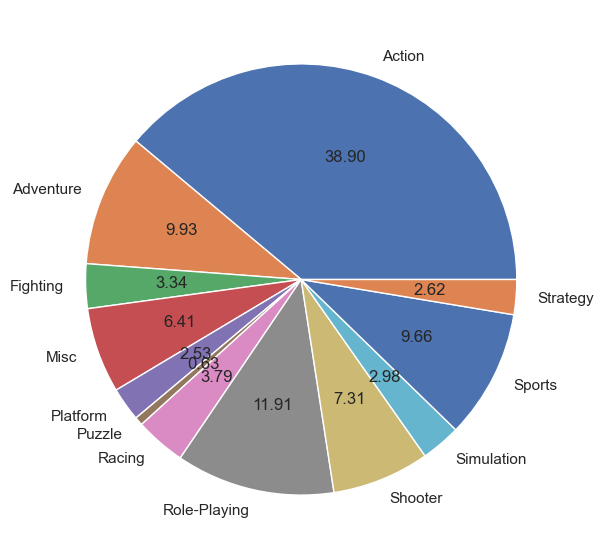

In [60]:
plt.figure(figsize=(20,7))
plt.pie(x=x, labels=genres, autopct="%.2f")
plt.show()

За период с 2015-2016г. больше всего выпускалось игр жанров:
* Action - 38.90%;
* Role-Playing - 11.91%;
* Adventure - 9.93%.

In [61]:
# продажи игр по жанрам
data_2015.groupby('genre')[['total_sales']].sum().sort_values('total_sales', ascending=False).style.bar()

,total_sales
genre,
Shooter,105.730000
Action,102.130000
Sports,64.330000
Role-Playing,55.820000
Misc,14.170000
Fighting,12.370000
Adventure,11.980000
Racing,10.860000
Platform,9.280000


За период с 2015-2016г. лидерами продаж игр по жанрам были:

* Shooter;
* Action;
* Sports.

In [62]:
# определеним наиболее прибыльные жанры
genre_sales = data_2015.pivot_table(index ='genre', values='total_sales', aggfunc='mean')\
.sort_values(by='total_sales', ascending=False)
genre_sales.head(6)

,total_sales
genre,
Shooter,1.31
Sports,0.60
Role-Playing,0.42
Fighting,0.33
Platform,0.33
Racing,0.26


Наиболее прибыльными жанрами в период 2015-2016г. были:

* Shooter;
* Sports;
* Role-Playing.

ВЫВОД:* В третьей части проекта мы выполнили исследовательский анализ данных. 

Посмотрели как менялись продажи по платформам за период с 2000г. по 2016г. Сделали вывод, что цикл жизни игровых платформ составляет примерно 10 лет. После начала спада продаж появляется новая платформа.

На основании проведенных исследований определили актуальный период с 2015г. по 2016г.  Данные этого периода помогут построить прогноз на 2017 год.

В целом продажи по всем платформам представленным в датасете к 2016 году падают. Скорее всего 
существуют другие платформы, не учитываемые в предоставленном файле.

Наиболее популярными в выбранный нами актуальный период с 2015г. по 2017г. были платформы PS4, XOne, 3DS, WiiU, PS3.

Платформы, которые имеют перспективы для продаж в 2017 году - PS4, XOne, 3DS.

Построение диаграммы 'ящик с усами' показало, что  наибольшие медианные продажи у платформ WiiU, Wii, XOne, PS4 и X360. Почти у всех платформ есть много выбросов. 

Построение матрицы корреляции и графиков показали, что оценки критиков демонстрируют прямую, средне-слабую корреляцию с 'цифрами' продаж. Оценки пользователей корреляции с продажами не имеют.

Самой прибыльной платформой за период с 2015г. по 2016г. была платформа PS4, она же занимала лидирующую позицию в top-5. На втором месте по прибыльности платформа XOne - занимающая также второе место по продажам.

Исследование игр по жанрам показало следующие результаты:

За период с 2015-2016г. больше всего выпускалось игр жанров:

* Action - 38.90%;
* Role-Playing - 11.91%;
* Adventure - 9.93%.

За период с 2015-2016г. лидерами продаж игр по жанрам были:

* Shooter;
* Action;
* Sports.

Наиболее прибыльными жанрами в период 2015-2016г. были:

* Shooter;
* Sports;
* Role-Playing.

## Составление портрета пользователя каждого региона. ##

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). 

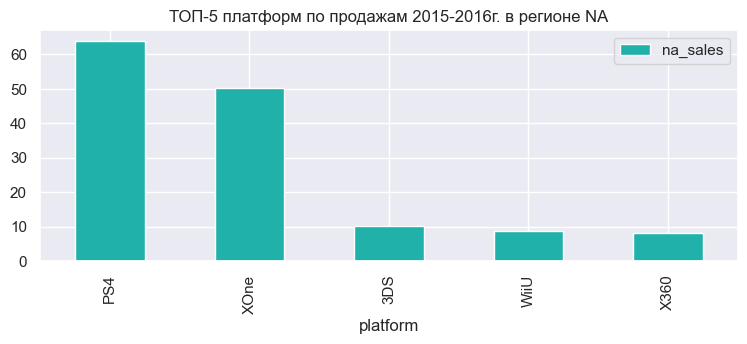

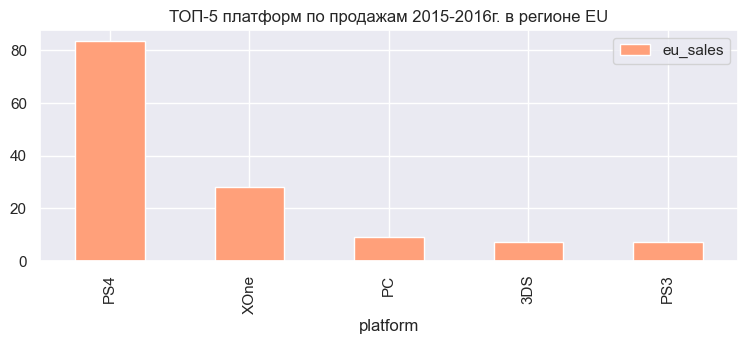

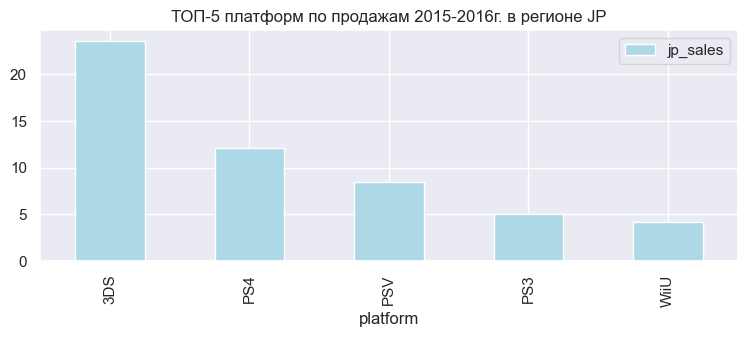

In [63]:
# определяем для пользователя каждого региона (NA, EU, JP) самые продающиеся платформы (топ-5):
data_2015.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),\
                                                                                                color='lightseagreen')
plt.title('ТОП-5 платформ по продажам 2015-2016г. в регионе NA')
plt.show()

data_2015.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),\
                                                                                                color='lightsalmon')
plt.title('ТОП-5 платформ по продажам 2015-2016г. в регионе EU')
plt.show()

data_2015.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),\
                                                                                                color='lightblue')
plt.title('ТОП-5 платформ по продажам 2015-2016г. в регионе JP')
plt.show()

In [64]:
# продажи по платформам в каждом регионе в цифрах
top_platform = data_2015.pivot_table(index = 'platform', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], \
                                     aggfunc='sum').sort_values(by='total_sales', ascending=False)
top_platform = top_platform.reset_index().rename_axis(None, axis=1)

top_platform.head()

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,83.54,12.05,63.86,188.15
1,XOne,28.10,0.18,50.30,86.29
2,3DS,7.39,23.55,10.31,42.92
3,WiiU,6.49,4.12,8.86,20.95
4,PS3,7.30,4.97,5.66,20.42


ТОП-5 платформ по продажам в регионе NA (PS4, XOne, 3DS, WiiU, X360): 
- самая популярная платформа - PS4;
- самые низкие продажи - платформа X360

ТОП-5 платформ по продажам в регионе EU (PS4, XOne, PC, 3DS, PS3):
- самая популярная платформа - PS4;
- самые низкие продажи - платформа PS3

ТОП-5 платформ по продажам в регионе JP (3DS, PS4, PSV, PS3, WiiU):
- самая популярная платформа - 3DS;
- самые низкие продажи - платформа WiiU

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).	

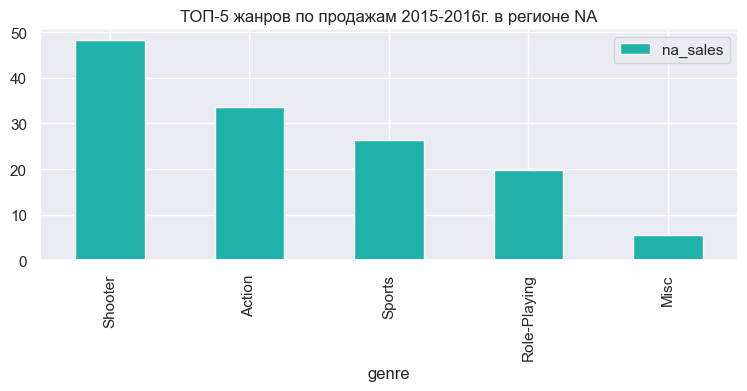

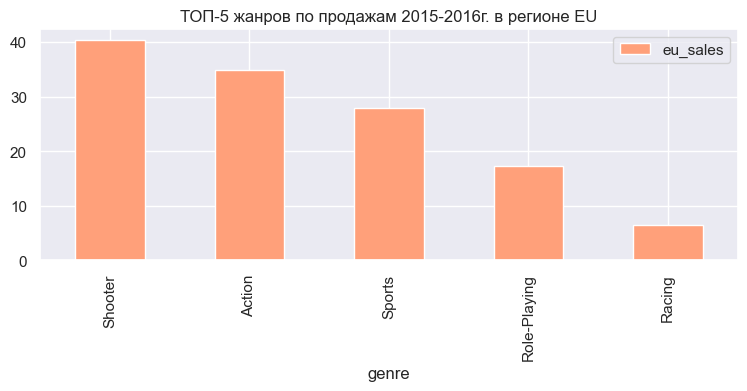

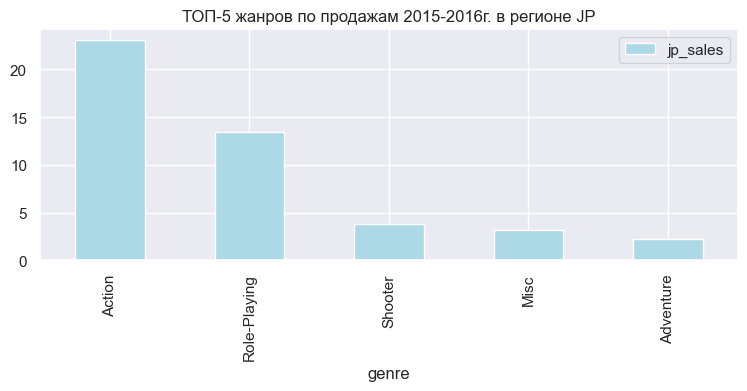

In [65]:
# определяем для пользователя каждого региона (NA, EU, JP) самые продающиеся жанры (топ-5):
data_2015.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),\
                                                                                                color='lightseagreen')
plt.title('ТОП-5 жанров по продажам 2015-2016г. в регионе NA')
plt.show()

data_2015.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),\
                                                                                                color='lightsalmon')
plt.title('ТОП-5 жанров по продажам 2015-2016г. в регионе EU')
plt.show()

data_2015.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),\
                                                                                                color='lightblue')
plt.title('ТОП-5 жанров по продажам 2015-2016г. в регионе JP')
plt.show()

In [66]:
# продажи по жанрам в каждом регионе в цифрах
top_genre = data_2015.pivot_table(index = 'genre', values=['total_sales','na_sales','eu_sales','jp_sales'], aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
top_genre = top_genre.reset_index().rename_axis(None, axis=1)

top_genre.head()

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Shooter,40.28,3.79,48.18,105.73
1,Action,34.82,23.05,33.68,102.13
2,Sports,27.82,1.65,26.31,64.33
3,Role-Playing,17.21,13.41,19.82,55.82
4,Misc,4.26,3.19,5.58,14.17


ТОП-5 жанров по продажам 2015-2016г. в регионе NA (Shooter, Action, Sports, Role-Playing, Misc): 
- самый популярный жанр - Shooter;
- непопулярный жанр - Misc

ТОП-5 жанров по продажам 2015-2016г. в регионе EU (Shooter, Action, Sports, Role-Playing, Racing):
- самый популярный жанр - Shooter;
- непопулярный жанр - Racing

ТОП-5 жанров по продажам 2015-2016г. в регионе JP (Action, Role-Playing, Shooter, Misc, Adventure):
- самый популярный жанр - Action;
- непопулярный жанр - Adventure

### Определим для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе.

Найдем влияние рейтинга на продажи в разных регионах:

С учетом категорий ESRB:

- EC ("Early childhood") — "Для детей младшего возраста"
- E ("Everyone") — "Для всех"
- E10+ ("Everyone 10 and older") — "Для всех от 10 лет и старше"
- T ("Teen") — "Подросткам"
- M ("Mature") — "Для взрослых"
- AO ("Adults Only 18+") — "Только для взрослых"
- RP ("Rating Pending") — "Рейтинг ожидается"

In [67]:
data_2015['rating'].unique()

array(['no_rating', 'E', 'M', 'T', 'E10+'], dtype=object)

In [68]:
# влияние рейтинга ESRB на продажи в отдельных регионах
rating = data_2015.pivot_table(index = 'rating', values=['total_sales','na_sales','eu_sales','jp_sales'], aggfunc='sum').\
sort_values(by='total_sales', ascending=False)
rating = rating.reset_index().rename_axis(None, axis=1)

# расшифруем рейтнги, чтоб иметь предстовление о чём идёт речь

def category(row):
    lemma = m.lemmatize(row['rating'])
    if 'no' in lemma:
        return 'Нет рейтинга'
    if 'E' in lemma:
        return 'Для всех'
    if 'M' in lemma:
        return 'От 17 лет'
    if 'T' in lemma :
        return 'Подросткам 13—19 лет'
    if 'E10' in lemma:
        return 'Для всех старше 10 лет'
    if 'EC' in lemma:
        return 'Для детей младшего возраста'
    if 'RP' in lemma:
        return 'Рейтинг ожидается'
    
rating['decryption'] = rating.apply(category, axis=1)
display(rating)

,rating,eu_sales,jp_sales,na_sales,total_sales,decryption
0,no_rating,35.71,32.89,37.44,117.17,Нет рейтинга
1,M,45.54,4.29,47.03,111.10,От 17 лет
2,E,34.83,5.25,26.59,75.24,Для всех
3,T,20.32,7.70,22.86,57.73,Подросткам 13—19 лет
4,E10+,11.54,3.27,17.87,36.68,Для всех старше 10 лет


## Проверка гипотез. ##

### Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H_a: Средние пользовательские рейтинги платформ Xbox One и PC различаются.
alpha = 0.05
```

In [69]:
# results = вызов метода для проверки гипотезы
sample_1 = data_2015[data_2015['platform'] == 'PC']['user_score'].dropna()
sample_2 = data_2015[data_2015['platform'] == 'XOne']['user_score'].dropna()

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=True)

# alpha = задаем значение уровня значимости
# если p-value окажется меньше него - отвергнем гипотезу

alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    


0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


In [70]:
# проверим результат работы с гипотезой
print('Среднее по платформе PC:', sample_1.mean())
print('Среднее по платформе XOne:', sample_2.mean())

Среднее по платформе PC: 6.296428571428573
Среднее по платформе XOne: 6.54214876033058


### Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средние пользовательские рейтинги жанров Action и Sports разные.
H_a: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
alpha = 0.05
```

In [71]:
# results = вызов метода для проверки гипотезы
sample_1 = data_2015[data_2015['genre'] == 'Action']['user_score'].dropna()
sample_2 = data_2015[data_2015['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=True)

# alpha = задаем значение уровня значимости
# если p-value окажется меньше него - отвергнем гипотезу

alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

1.0012846807938657e-13
Не получилось отвергнуть нулевую гипотезу


In [72]:
# проверим результат работы с гипотезой
print('Среднее по жанру Action:', sample_1.mean())
print('Среднее по жанру Sports:', sample_2.mean())

Среднее по жанру Action: 6.8082901554404085
Среднее по жанру Sports: 5.1987804878048784


Пороговое значение критического уровня значимости alpha выбираем 0.5. 

Уровень значимости α=0,05 означает, что допускается не более чем 5%-ая вероятность ошибки. 
Традиционно уровень значимости α=0,05 выбирается для небольших выборок, в которых велика вероятность ошибки 2-го рода.

*Проверка гипотез.*

- гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые в период с 2006 по 2016, была отвергнута.
- гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные в период с 2006 по 2016, была отвергнута. 

## Общий вывод. ##

Основной задачей проекта было определить закономерности, которые определяют успешность игр. Основные параметры, которыми мы оперировали это платформы, жанры, оценки пользователей и критиков, продажи по регионам и суммарные продажи.

В имеющемся файле представлены данные о продажах интернет-магазином "Стримчик" компьютерных игр по всему миру за период до 2016 года.

В первой части проекта мы загрузили данные из файла в датафрейм, изучили общую информацию о данных. Определили наличие явных и неявных дубликатов. Построили общую гистограмму для всех числовых столбцов таблицы для получения общей информации.

**Подготовка данных.**

Во второй части проекта мы выполнили предобработку данных. 

Для лучшего восприятия данных привели к нижнему регистру название столбцов.

Изучили и обработали данные в столбцах с оценками. При изучении уникальных значений столбца 'user_score' встречается значение 'tbd', которое означает, что какая-то информация еще не определена или решение по вопросу не принято. И это значение чаще всего встречается в период с 2002 по 2011г. Следовательно, если как такового решения еще нет, значит можем заменить все 'tbd' на nan.

Преобразовали данные в нужные типы: 

- заменили тип данных в столбце 'year_of_release' на 'Int64' т.к. год - это целое число,
- заменили тип данных в столбце 'user_score' на 'float64', в связи с тем, что для определения оценок важно значение после запятой.

Выявили и обработали пропуски. Пропуски могли появится от незнания каких-либо данных пользователем, нежелания их заполнять или неверного формата. Пропуски в столбце year_of_release возникли возможно из-за того, что игры не вышли в релиз на момент состава датасета.

Пропуски в столбцах 'name', 'genre' и 'year_of_release' удалили в связи с тем, что их менее 2%.

В случае необходимости обращения к полным данным, мы сохранили датафрейм до удаления строк как data_full.

Пропуски в столбцах оценок критиков и пользователей оставляем как есть, т.к. если заполним пропуски в данных столбцах нулями, то это понизит рейтинг игры (рейтинг игры в реальности может быть высоким), а если заполним пропуски медианой или средним значением - это так же исказит реальную картину (по факту рейтинг может быть низким).

Пропуски в столбце 'rating' заменили на значение 'no_rating'. 

**Исследовательский анализ данных.**

Количество игр росло с 1994, пик роста- 2008-2009 г., Затем начинается спад, видимо, связанный с ростом популярности мобильных игр. Соответственно, для исследования важны данные с 2000 года, когда кол-во игр начало резко расти.

Посмотрели как менялись продажи по платформам за период с 2000г. по 2016г. Сделали вывод, что цикл жизни игровых платформ составляет примерно 10 лет. После начала спада продаж появляется новая платформа.

На основании проведенных исследований определили актуальный период с 2015г. по 2016г.  Данные этого периода помогут построить прогноз на 2017 год.

В целом продажи по всем платформам представленным в датасете к 2016 году падают. Скорее всего 
существуют другие платформы, не учитываемые в предоставленном файле.

Наиболее популярными в выбранный нами актуальный период с 2015г. по 2017г. были платформы PS4, XOne, 3DS, WiiU, PS3.

Платформы, которые имеют перспективы для продаж в 2017 году - PS4, XOne, 3DS.

Построение диаграммы 'ящик с усами' показало, что  наибольшие медианные продажи у платформ WiiU, Wii, XOne, PS4 и X360. Почти у всех платформ есть много выбросов. 

Построение матрицы корреляции и графиков показали, что оценки критиков демонстрируют прямую, средне-слабую корреляцию с 'цифрами' продаж. Оценки пользователей корреляции с продажами не имеют.

Самой прибыльной платформой за период с 2015г. по 2016г. была платформа PS4, она же занимала лидирующую позицию в top-5. На втором месте по прибыльности платформа XOne - занимающая также второе место по продажам.

Исследование игр по жанрам показало следующие результаты:

За период с 2015-2016г. больше всего выпускалось игр жанров:

Action - 38.90%;
Role-Playing - 11.91%;
Adventure - 9.93%.
За период с 2015-2016г. лидерами продаж игр по жанрам были:

Shooter;
Action;
Sports.
Наиболее прибыльными жанрами в период 2015-2016г. были:

Shooter;
Sports;
Role-Playing.


**Портрет пользователя каждого региона.**

*Платформы в 2015-2016г. были:*

- самая популярная платформа в регионе NA - PS4;
- самые низкие продажи в регионе NA - платформа X360

- самая популярная платформа в регионе EU - PS4;
- самые низкие продажи в регионе EU - платформа PS3

- самая популярная платформа в регионе JP - 3DS;
- самые низкие продажи в регионе JP - платформа WiiU



*Жанры в 2015-2016г. были:*

- самый популярный жанр в регионе NA- Shooter;
- непопулярный жанр в регионе NA  - Misc

- самый популярный жанр в регионе EU - Shooter;
- непопулярный жанр в регионе EU - Racing

- самый популярный жанр в регионе JP - Action;
- непопулярный жанр в регионе JP - Adventure

*Рейтинг ESRB в 2015-2016г. были:*

- самый высокий рейтинг в регионе NA - M (От 17 лет);
- самый низкий рейтинг в регионе NA - E10+ (Для всех старше 10 лет)

- самый высокий рейтинг в регионе EU - M (Для всех);
- самый низкий рейтинг в регионе EU - E10+ (Для всех старше 10 лет)

- самый высокий рейтинг в регионе JP - no_rating (Нет рейтинга);
- самый низкий рейтинг в регионе JP - E10+ (Для всех старше 10 лет)


Показатели Европы и Северной Америки в целом схожи. Япония, в силу своего особого менталитета и стандартизации, отличается от остальных регионов исследования. Скорее всего для игроманов Японии рейтинг ESRB мало что значит.

**Проверка гипотез.**

* гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые в период с 2006 по 2016, была отвергнута.
* гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные в период с 2006 по 2016, была отвергнута.

**Планирование на будущие периоды.**

В нашем исследовании мы проанализировали игры 'с разных точек зрения' и пришли к выводу, что в предстоящем  2017 году:

* для регионов Северной Америки и Европы необходимо делать ставку на платформы PS4 и XOne с жанрами Shooter и Action и рейтингами ESRB M - 'От 17 лет', E - 'Для всех' и без рейтинга;


* для региона Японии следует уделять внимание платформам 3DS и PS4 с жанрами Action и Role-Playing, рейтинг ESRB для Японии  мало что значит.

Учитывая то, что игровая индустрия постоянно меняется, скорее всего 2017 год будет последним годом жизненного цикла некоторых перечисленные выше платформ (основание -  спад популярности исследуемых платформ в 2016 году).

Для безубыточной и непрерывной деятельности интернет-магазина компьютерных игр "Стримчик",  уже в 2017 году необходимо изучать рынок новых платформ и, соответственно новые предпочтения жанров потенциальных пользователей. Параллельно делая ставку на платформу PS4 в регионах Европы и Северной Америки, спрос на которую будет постепенно снижаться примерно до 2023г. и на платформу 3DS для Японии, скорее всего она будет пользоваться спросом до 2020г.

